# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import ast

# Read Data 

In [2]:
click = pd.read_csv('../input/fashion-campus/click_stream.csv')
cust = pd.read_csv('../input/fashion-campus/customer.csv')
product = pd.read_csv('../input/fashion-campus/product.csv', on_bad_lines='skip')
trans = pd.read_csv('../input/fashion-campus/transactions.csv')

# Cek Data Transaksi dan Click Stream Booking

In [3]:
ses_book = click[click['event_name'] == 'BOOKING']

In [4]:
trans_book = trans[['booking_id','session_id']].merge(ses_book, on='session_id', how='left', indicator=True)

In [5]:
trans_book.head()

,booking_id,session_id,event_name,event_time,event_id,traffic_source,event_metadata,_merge
0,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,BOOKING,2018-07-29T15:22:01.458193Z,74a81855-2725-42f8-968d-9a142316745d,WEB,{'payment_status': 'Success'},both
1,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,BOOKING,2018-07-30T12:40:22.365620Z,ace20e22-053f-416c-987f-7d9599c30353,MOBILE,{'payment_status': 'Success'},both
2,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,BOOKING,2018-09-15T11:51:17.365620Z,8dd15a94-e987-4bdf-a9c9-9a5d2072e8a5,MOBILE,{'payment_status': 'Success'},both
3,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,BOOKING,2018-11-01T11:23:48.365620Z,e44648d8-be8c-47ac-ab38-ba67cfb03d11,MOBILE,{'payment_status': 'Success'},both
4,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,BOOKING,2018-12-18T11:20:30.365620Z,4db72e33-b40f-4f5e-a9dc-b60caa989b37,MOBILE,{'payment_status': 'Success'},both


In [6]:
trans_book[trans_book['_merge'] == 'left_only']

,booking_id,session_id,event_name,event_time,event_id,traffic_source,event_metadata,_merge
848700,9dd7ca0b-0c84-473b-8c2d-2998358b4782,a00f6bc1-87a4-4a03-84b9-3cf9874f1613,NaN,NaN,NaN,NaN,NaN,left_only
848701,24793e46-d2d6-4b21-8223-4d721a133a85,72dc1452-68fe-439b-bf4b-e3050597bba5,NaN,NaN,NaN,NaN,NaN,left_only


terdapat 2 data transaksi yang event_name nya bukan BOOKING, padahal dia punya booking_id, mari kita cari tahu apa event_namenya

In [7]:
click[click['session_id'] == 'a00f6bc1-87a4-4a03-84b9-3cf9874f1613'][['session_id','event_name','event_metadata']]

,session_id,event_name,event_metadata


In [8]:
click[click['session_id'] == '72dc1452-68fe-439b-bf4b-e3050597bba5'][['session_id','event_name','event_metadata']]

,session_id,event_name,event_metadata


ternyata dia gadaa data session_id dan click_streamnya? HOW CAN?! mari kita lihat data lain yang punya event_name BOOKING

In [9]:
click[click['session_id'] == '3abaa6ce-e320-4e51-9469-d9f3fa328e86'][['session_id','event_name','event_metadata']]

,session_id,event_name,event_metadata
12609138,3abaa6ce-e320-4e51-9469-d9f3fa328e86,HOMEPAGE,NaN
12609139,3abaa6ce-e320-4e51-9469-d9f3fa328e86,ADD_TO_CART,"{'product_id': 54728, 'quantity': 1, 'item_pri..."
12609140,3abaa6ce-e320-4e51-9469-d9f3fa328e86,ADD_PROMO,"{'promo_code': 'WEEKENDSERU', 'promo_amount': ..."
12609141,3abaa6ce-e320-4e51-9469-d9f3fa328e86,BOOKING,{'payment_status': 'Success'}
12609142,3abaa6ce-e320-4e51-9469-d9f3fa328e86,CLICK,NaN
12609143,3abaa6ce-e320-4e51-9469-d9f3fa328e86,CLICK,NaN
12609144,3abaa6ce-e320-4e51-9469-d9f3fa328e86,PROMO_PAGE,NaN
12609145,3abaa6ce-e320-4e51-9469-d9f3fa328e86,HOMEPAGE,NaN
12609146,3abaa6ce-e320-4e51-9469-d9f3fa328e86,PROMO_PAGE,NaN
12609147,3abaa6ce-e320-4e51-9469-d9f3fa328e86,ADD_TO_CART,"{'product_id': 43341, 'quantity': 1, 'item_pri..."


ternyata setelah dicek, data id_session yang punya booking_id dan event BOOKING tervalidasi datanya di click_stream. maka 2 data tadi kita drop aja soalnya mungkin itu ada salah input

In [10]:
transaction_book = trans[['booking_id','session_id']].merge(ses_book, on='session_id', how='inner')

In [11]:
transaction_book.shape

(852582, 7)

# jumlah masing2 event_name tiap session

In [12]:
click['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

ada 9 jenis event: HOMEPAGE, SCROLL, ADD_TO_CART, BOOKING, SEARCH, ITEM_DETAIL, ADD_PROMO, CLICK, PROMO_PAGE

In [13]:
click.shape

(12833602, 6)

In [14]:
click.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [15]:
trans['session_id'].value_counts()

3abaa6ce-e320-4e51-9469-d9f3fa328e86    1
fd1c35ad-9a81-4ff9-9c13-909216f4e954    1
82ca8ea9-735b-48e5-9f29-8bd4c30dba55    1
f0118283-e2bc-4bc4-843e-30b5adc7082d    1
c94f7bd9-5b04-4172-b4ef-bfee94e4960c    1
                                       ..
1c1454f4-d187-4779-bd25-641f281e84a7    1
bb4cbffe-b429-4ee8-83e3-aa4fc6ad9b9e    1
049a3c41-928e-446d-b3dd-97b12642f58f    1
b9625971-a539-4bc4-87f2-da062b5ff9df    1
5e3183df-198b-40e0-b861-27ef694a832a    1
Name: session_id, Length: 852584, dtype: int64

ada user yang hanya membuat account, lalu mencoba aplikasi dengan meng-klik berbagai macam tombol yang ada, namun tidak pernah melakukan transaksi. untuk pengecekan behavior user dalam melakukan click_stream hanya bisa dilakukan pada user yang pernah melakukan transaksi, baik transaksinya sukses ataupun gagal (table click_stream --> merge transactions ('session_id') --> merge customer ('customer_id')). LALU BAGAIMANA NASIB CUSTOMER YANG TIDAK PERNAH TRANSAKSI? KITA TIDAK BISA MENGECEK BEHAVIORNYA DONG? sepertinya iyes

In [16]:
# data click_stream yang tidak bisa dicek siapa customernya (click.shape - cust_session.shape)
12833602 - 12463004

370598

In [17]:
# merging dengan data cust
cust_session = click.iloc[:,:2].merge(trans, on='session_id', how='inner')
cust_session = cust_session.iloc[:,[0,1,3]]

In [18]:
cust_session.shape

(12463004, 3)

In [19]:
cust_session.head()

,session_id,event_name,customer_id
0,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,18770
1,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,18770
2,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,18770
3,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,18770
4,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,18770


In [20]:
w = cust_session[cust_session['customer_id'] == 18770]
w

,session_id,event_name,customer_id
0,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,18770
1,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,18770
2,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,18770
3,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,18770
4,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,18770
...,...,...,...
2390,dc85c13c-7791-4437-b038-d46f6cbfb14f,SEARCH,18770
2391,dc85c13c-7791-4437-b038-d46f6cbfb14f,SCROLL,18770
2392,dc85c13c-7791-4437-b038-d46f6cbfb14f,SCROLL,18770
2393,dc85c13c-7791-4437-b038-d46f6cbfb14f,CLICK,18770


# Merge Data

In [21]:
df = cust.merge(right = trans, how = 'left', on = 'customer_id')
df.isna().sum()

customer_id                    0
first_name                     0
last_name                      0
username                       0
email                          0
gender                         0
birthdate                      0
device_type                    0
device_id                      0
device_version                 0
home_location_lat              0
home_location_long             0
home_location                  0
home_country                   0
first_join_date                0
created_at                 49295
booking_id                 49295
session_id                 49295
product_metadata           49295
payment_method             49295
payment_status             49295
promo_amount               49295
promo_code                575343
shipment_fee               49295
shipment_date_limit        49295
shipment_location_lat      49295
shipment_location_long     49295
total_amount               49295
dtype: int64

# FI : Total Transaksi Masing2 Cust

In [22]:
# merge data customer dengan transaksinya (baik transaksi sukses maupun gagal)
cust_trans = cust.merge(right = trans, how = 'left', on = 'customer_id')

# buat tabel mengenai total transaksi tiap pelanggan
total_transaksi = cust_trans.groupby('customer_id')[['booking_id']].count().sort_values(by = 'booking_id', ascending = False).reset_index()
total_transaksi = total_transaksi.rename(columns = {'booking_id' : 'total_transaksi'})

# buat tabel mengenai total transaksi sukses tiap pelanggan
sukses = cust_trans[cust_trans['payment_status'] == 'Success']
total_transaksi_sukses = sukses.groupby('customer_id')[['booking_id']].count().sort_values(by = 'booking_id', ascending = False).reset_index()
total_transaksi_sukses = total_transaksi_sukses.rename(columns = {'booking_id' : 'total_transaksi_sukses'})

# buat tabel mengenai total transaksi sukses tiap pelanggan
gagal = cust_trans[cust_trans['payment_status'] == 'Failed']
total_transaksi_gagal = gagal.groupby('customer_id')[['booking_id']].count().sort_values(by = 'booking_id', ascending = False).reset_index()
total_transaksi_gagal = total_transaksi_gagal.rename(columns = {'booking_id' : 'total_transaksi_gagal'})

# merge total, sukses, dan gagal
transaksi_all = total_transaksi.merge(total_transaksi_sukses, on='customer_id', how='outer')
transaksi_all = transaksi_all.merge(total_transaksi_gagal, on='customer_id', how='outer')

# handling NaN
transaksi_all = transaksi_all.fillna(0)

# buat kolom yang menjelaskan frekuensi order tiap pelanggan (asumsi = jika dibawah sama dengan 3 disebut sedikit, selain itu banyak)
def freq(x):
    if x == 0:
        return 'never'
    elif x <= 3:
        return 'few'
    else:
        return 'many'
transaksi_all['transaksi_freq'] = transaksi_all['total_transaksi_sukses'].apply(freq)

In [23]:
transaksi_all.head()

,customer_id,total_transaksi,total_transaksi_sukses,total_transaksi_gagal,transaksi_freq
0,43202,550,550.0,0.0,many
1,29496,505,505.0,0.0,many
2,82237,503,503.0,0.0,many
3,10167,473,460.0,13.0,many
4,69740,458,458.0,0.0,many


In [24]:
transaksi_all['transaksi_freq'].value_counts().reset_index()

,index,transaksi_freq
0,never,49758
1,many,30755
2,few,19487


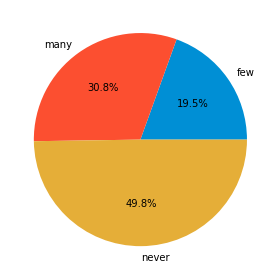

In [25]:
transaksi_visual = transaksi_all.groupby('transaksi_freq')['customer_id'].count().reset_index()
transaksi_visual = transaksi_visual.rename(columns = {'customer_id' : 'total_customer'})

plt.pie(x = transaksi_visual['total_customer'], labels = transaksi_visual['transaksi_freq'], autopct='%1.1f%%')
plt.tight_layout()
plt.show()

jumlah customer yang tidak pernah melakukan transaksi sangat banyak, yakni mencapai 49% dari total customer keseluruhan, dan jumlah customer yang melakukan transaksi (sukses) lebih dari 3 kali (many) cukup banyak, yakni mencapai hampir 1/3 dari total customer keseluruhan

# FI : Tanggal transaksi pertama dan transaksi terakhir (transaksi sukses)

In [26]:
trans_success = trans[trans['payment_status'] == 'Success']

# buat tabel yang menginfokan tanggal pembelian pertama tiap pelanggan
first_purchase = trans_success.groupby(['customer_id'])['created_at'].min()
first_purchase = pd.DataFrame(data = first_purchase).reset_index()
first_purchase['created_at'] = pd.to_datetime(first_purchase['created_at']).dt.date
first_purchase = first_purchase.rename(columns = {'created_at' : 'first_purchase_date'})

# buat tabel yang menginfokan tanggal pembelian terakhir tiap pelanggan
last_purchase = trans_success.groupby(['customer_id'])['created_at'].max()
last_purchase = pd.DataFrame(data = last_purchase).reset_index()
last_purchase['created_at'] = pd.to_datetime(last_purchase['created_at']).dt.date
last_purchase = last_purchase.rename(columns = {'created_at' : 'last_purchase_date'})

In [27]:
# gabungkan tabel first_purchase dan last_purchase
purchase_date = pd.merge(left = first_purchase, right = last_purchase, on = 'customer_id')

# buat kolom mengenai recency tiap pelanggan
purchase_date['recency_days'] = pd.to_datetime("today").date() - purchase_date['last_purchase_date']

In [28]:
purchase_date.head()

,customer_id,first_purchase_date,last_purchase_date,recency_days
0,3,2018-08-25,2022-06-26,119 days
1,8,2021-02-13,2022-05-15,161 days
2,9,2021-06-27,2022-05-28,148 days
3,11,2022-03-07,2022-03-07,230 days
4,15,2019-09-30,2022-01-05,291 days


In [29]:
purchase_date.shape

(50242, 4)

# FI : Jumlah event click masing2 cust yang telah transaksi

In [30]:
# merging dengan data cust
cust_session = click.iloc[:,:2].merge(trans, on='session_id', how='inner')
cust_session = cust_session.iloc[:,[0,1,3]]

# ambil frequency event masing-masing cust
total_event = cust_session.groupby(['customer_id','event_name']).count().reset_index()
# total_event

# buat feature baru
total_event = total_event.pivot_table('session_id', ['customer_id'], 'event_name')

# showing dataframe
total_event = total_event.rename_axis(None, axis=1).reset_index()

# handling NaN
total_event = total_event.fillna(0)

# rename columns
total_event = total_event.rename({
    'ADD_PROMO' : 'add_promo_freq',
    'ADD_TO_CART' : 'add_to_cart_freq',
    'BOOKING' : 'booking_freq',
    'CLICK' : 'click_freq',
    'HOMEPAGE' : 'homepage_freq',
    'ITEM_DETAIL' : 'item_detail_freq',
    'PROMO_PAGE' : 'promo_page_freq',
    'SCROLL' : 'scroll_freq',
    'SEARCH' : 'search_freq'
}, axis='columns') 


total_event.head()

,customer_id,add_promo_freq,add_to_cart_freq,booking_freq,click_freq,homepage_freq,item_detail_freq,promo_page_freq,scroll_freq,search_freq
0,3,27.0,156.0,51.0,118.0,109.0,56.0,42.0,72.0,51.0
1,8,1.0,14.0,7.0,25.0,93.0,32.0,5.0,16.0,9.0
2,9,0.0,16.0,6.0,11.0,8.0,5.0,3.0,6.0,4.0
3,11,1.0,4.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0
4,15,4.0,21.0,5.0,9.0,9.0,3.0,1.0,2.0,3.0


In [31]:
total_event.shape

(50704, 10)

# mengecek jumlah session masing2 user dan berapa waktu yang dihabiskan user di platform

In [32]:
# buat tabel yang menginfokan waktu interaksi pertama tiap session
first_interact = click.groupby(['session_id'])['event_time'].min()
first_interact = pd.DataFrame(data = first_interact).reset_index()
# first_interact['event_time'] = pd.to_datetime(first_interact['event_time']).dt.time

first_interact['event_time'] = pd.to_datetime(first_interact['event_time'])
first_interact = first_interact.rename(columns = {'event_time' : 'first_interact_time'})

# buat tabel yang menginfokan waktu interaksi pertama tiap session
last_interact = click.groupby(['session_id'])['event_time'].max()
last_interact = pd.DataFrame(data = last_interact).reset_index()
# last_interact['event_time'] = pd.to_datetime(last_interact['event_time']).dt.time
last_interact['event_time'] = pd.to_datetime(last_interact['event_time'])
last_interact = last_interact.rename(columns = {'event_time' : 'last_interact_time'})

In [33]:
# gabungkan tabel first_interact dan last_interact
session_time = pd.merge(left = first_interact, right = last_interact, on = 'session_id')

# buat kolom mengenai waktu yang dihabiskan tiap session
session_time['session_time'] = session_time['last_interact_time'] - session_time['first_interact_time']

In [34]:
session_time.head()

,session_id,first_interact_time,last_interact_time,session_time
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05-17 11:51:52.276396+00:00,2019-05-19 20:17:04.276396+00:00,2 days 08:25:12
1,00003eca-954b-4150-aee1-63fc62f395cf,2019-08-24 05:47:16.849738+00:00,2019-08-24 06:26:12.662344+00:00,0 days 00:38:55.812606
2,0000425b-ddc8-4459-a240-6ba814dac132,2019-02-05 13:38:59.490443+00:00,2019-04-28 10:08:01.490443+00:00,81 days 20:29:02
3,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08 23:17:19.510057+00:00,2022-03-08 23:21:35.510057+00:00,0 days 00:04:16
4,0000649b-9514-4600-979b-42166a798996,2020-07-17 13:32:48.525079+00:00,2020-07-23 14:31:15.525079+00:00,6 days 00:58:27


In [35]:
cust_session_time = trans.merge(session_time, on='session_id', how='inner')
cust_session_time = cust_session_time.groupby('customer_id')['session_time'].sum().reset_index()
cust_session_time = cust_session_time.sort_values('session_time', ascending=False)

In [36]:
cust_session_time.head()

,customer_id,session_time
43284,85396,1090 days 07:44:45.557140992
3885,7473,1040 days 09:01:32.393412992
22196,43399,1034 days 13:59:11.397868992
835,1642,1031 days 05:19:09.461424
41267,81415,1029 days 04:12:58.103964992


In [37]:
cust_session_freq = trans.merge(session_time, on='session_id', how='inner')
cust_session_freq = cust_session_freq.groupby('customer_id')['session_id'].count().reset_index()
cust_session_freq = cust_session_freq.rename(columns = {'session_id' : 'total_session'})
cust_session_freq = cust_session_freq.sort_values('total_session', ascending=False)

In [38]:
cust_session_freq.head()

,customer_id,total_session
22114,43202,550
15106,29496,505
41660,82237,503
5261,10167,473
35432,69740,458


In [39]:
cust_sess_total = cust_session_freq.merge(cust_session_time, on='customer_id')
cust_sess_total['avg_session_time'] = cust_sess_total['session_time'] / cust_sess_total['total_session']
cust_sess_total

,customer_id,total_session,session_time,avg_session_time
0,43202,550,841 days 10:09:22.980147008,1 days 12:42:59.932691176
1,29496,505,554 days 05:09:02.968033,1 days 02:20:20.085085213
2,82237,503,706 days 18:34:59.166003,1 days 09:43:22.185220681
3,10167,473,649 days 21:06:34.125936,1 days 08:58:29.501323331
4,69740,458,517 days 08:02:01.589935,1 days 03:06:33.278580644
...,...,...,...,...
50699,80494,1,0 days 00:40:10.584424,0 days 00:40:10.584424
50700,14513,1,0 days 00:20:36.573197,0 days 00:20:36.573197
50701,80510,1,0 days 01:38:16.502030,0 days 01:38:16.502030
50702,56174,1,0 days 00:49:22.785180,0 days 00:49:22.785180


# Normalize json

In [40]:
click['event_metadata'] = click['event_metadata'].fillna('{}')

In [41]:
click['event_metadata'] = click['event_metadata'].apply(ast.literal_eval)

In [42]:
click = pd.concat([click.drop(['event_metadata'], axis=1), pd.json_normalize(click['event_metadata'])], axis=1)

In [43]:
# search_click = click[click['event_name'] == 'SEARCH'][['session_id','search_keywords']]
add_to_cart_click = click[click['event_name'] == 'ADD_TO_CART'][['session_id','product_id','quantity','item_price']]
add_to_cart_click

,session_id,product_id,quantity,item_price
3,7d440441-e67a-4d36-b324-80ffd636d166,15315.0,4.0,313529.0
12,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,6133.0,2.0,249443.0
13,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,6721.0,1.0,134504.0
14,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,57622.0,1.0,384716.0
15,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,5490.0,1.0,121318.0
...,...,...,...,...
12833583,f38416ce-51f2-46b0-a476-776d8fed1cb0,4869.0,1.0,282771.0
12833587,c1ce86f6-858b-4009-af5b-f1483a28d020,25127.0,1.0,166365.0
12833591,f5c4bbe0-f977-45bb-af23-6ab524df7777,19386.0,1.0,208644.0
12833595,ad1063b0-a6e5-40a9-aed6-d1b45741e571,13143.0,1.0,284949.0


In [44]:
add_to_cart_click['session_id'].value_counts()

eaeb79af-fbe8-4825-8457-c73f5937ef96    52
63687c42-bbbc-443a-be21-2e15e0e8c7a9    49
5f3094ac-b3e4-4dc1-b1a2-bd492634abea    49
2744464b-1097-4bb5-89e2-275aba30d3ea    48
5aa4bcd3-d4a7-400f-a11f-5cf38b751fe4    43
                                        ..
d57ffd34-889c-47a3-8c5c-7f7b6b443956     1
d60e345b-31a0-410d-895f-3e40a88d94ce     1
5cd98885-b44b-4d23-9490-bbaf4387bae7     1
514d016e-1fd4-48fb-a890-599bcf8a27c4     1
64585e37-3fe7-48d7-b79b-ebcb70230eb2     1
Name: session_id, Length: 872061, dtype: int64